In [1]:
import os
import numpy as np
import pandas as pd
import plotly as py
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import contextily as ctx
import matplotlib.image as mpimg
import matplotlib
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs 
from plotly.offline import init_notebook_mode
from plotly.offline import plot,iplot
init_notebook_mode(connected=True)
import seaborn as sns
import geos
import mpl_toolkits
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc



In [2]:
data=pd.read_csv('Road accidents data/only_road_accidents_data3.csv')

In [3]:
data.head()

,STATE/UT,YEAR,0-3 hrs. (Night),3-6 hrs. (Night),6-9 hrs (Day),9-12 hrs (Day),12-15 hrs (Day),15-18 hrs (Day),18-21 hrs (Night),21-24 hrs (Night),Total
0,A & N Islands,2001,2,6,29,40,39,40,18,7,181
1,A & N Islands,2002,2,6,22,41,33,33,23,8,168
2,A & N Islands,2003,2,8,31,35,28,36,25,15,180
3,A & N Islands,2004,2,5,29,42,43,43,37,14,215
4,A & N Islands,2005,0,8,27,28,38,42,50,13,206


In [4]:
data_by_states=data.loc[:,['STATE/UT','YEAR','Total']]

In [5]:
data_by_states.head()

,STATE/UT,YEAR,Total
0,A & N Islands,2001,181
1,A & N Islands,2002,168
2,A & N Islands,2003,180
3,A & N Islands,2004,215
4,A & N Islands,2005,206


In [6]:
df1=data_by_states.drop('YEAR',axis=1)
df1.head()

,STATE/UT,Total
0,A & N Islands,181
1,A & N Islands,168
2,A & N Islands,180
3,A & N Islands,215
4,A & N Islands,206


In [7]:
df1=df1.groupby('STATE/UT').sum().reset_index().sort_values(by='Total',ascending=False)

In [8]:
df1.head()

,STATE/UT,Total
30,Tamil Nadu,852073
20,Maharashtra,641614
16,Karnataka,584761
1,Andhra Pradesh,546821
17,Kerala,518161


Above are the total number of road accidents from 2001-2014

Text(0.5, 1.0, 'Cases of road accidents in each state/UT from 2001-14')

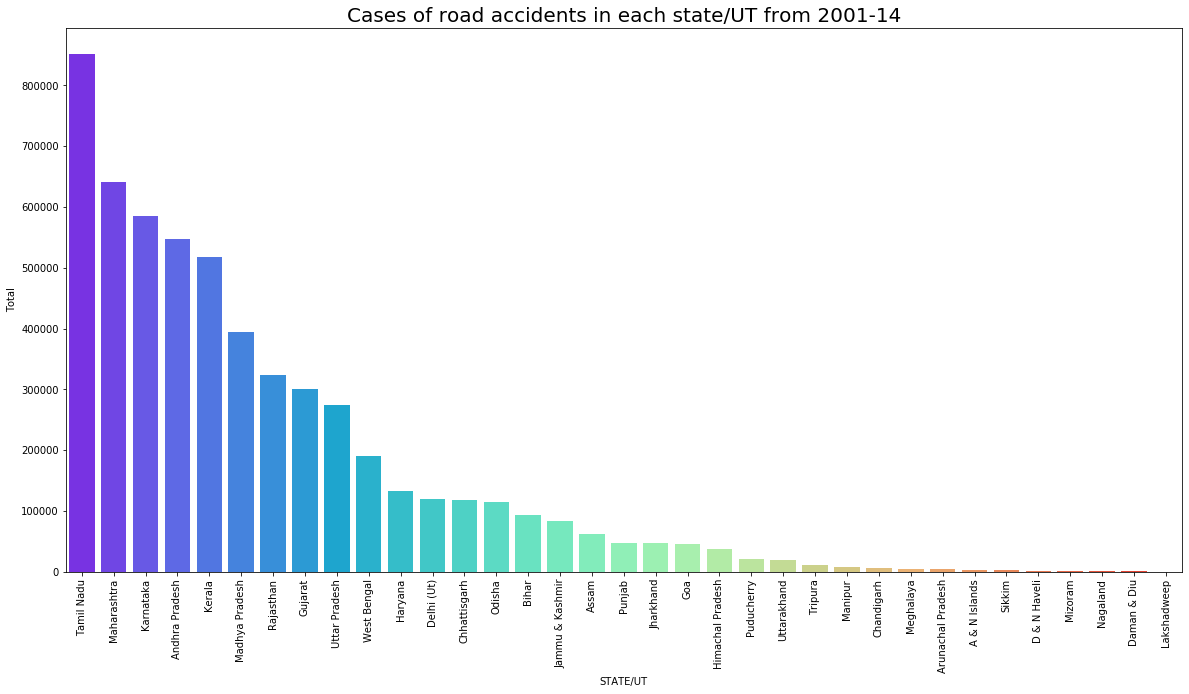

In [9]:
plt.figure(figsize=(20,10))

sns.barplot(x=df1['STATE/UT'],y=df1['Total'],palette='rainbow')
plt.xticks(rotation=90)

plt.title('Cases of road accidents in each state/UT from 2001-14',size=20)


A visual representation of all the road accidents in the states

In [10]:
df_top=df1[df1['Total']>300000]
df_top

,STATE/UT,Total
30,Tamil Nadu,852073
20,Maharashtra,641614
16,Karnataka,584761
1,Andhra Pradesh,546821
17,Kerala,518161
19,Madhya Pradesh,394007
28,Rajasthan,323653
11,Gujarat,300325


Text(0.5, 1.0, 'States with highest road accidents between 2001-14')

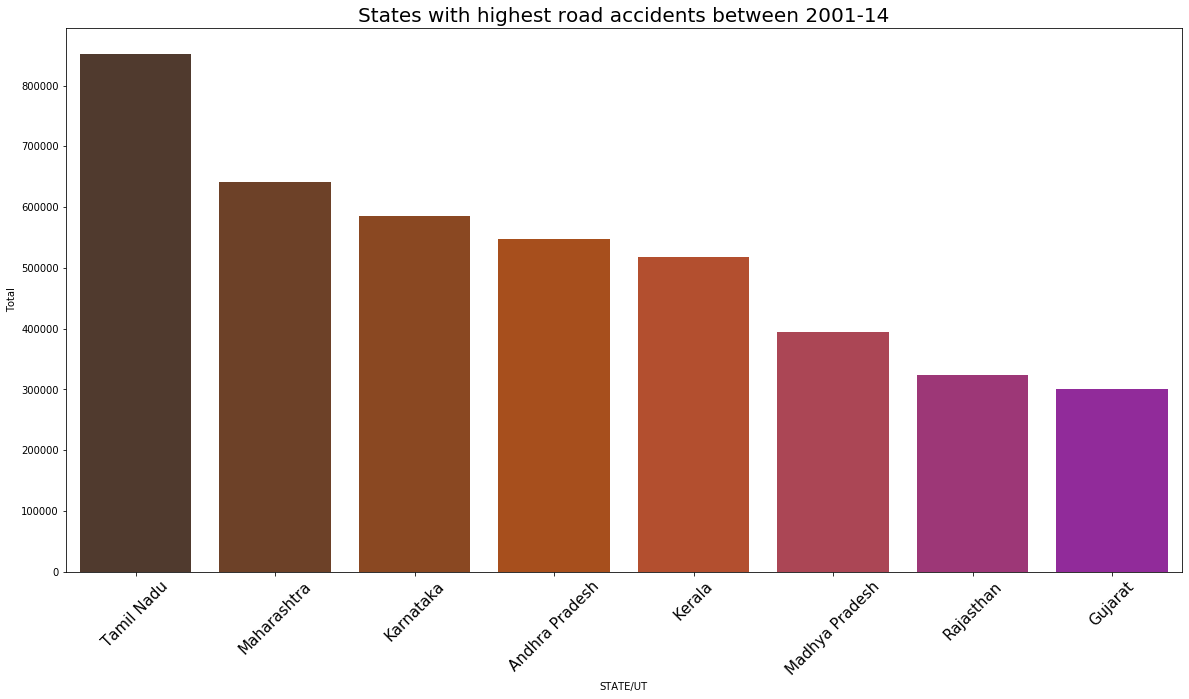

In [11]:
plt.figure(figsize=(20,10))
sns.barplot(x=df_top['STATE/UT'],y=df_top['Total'],palette='gnuplot_d')
plt.xticks(size=15,rotation=45)
plt.yticks(size=10)

plt.title('States with highest road accidents between 2001-14',size=20)

The above states have each had above or equal to 3 lakh road accident cases.

In [12]:
df_year=data_by_states.groupby('YEAR').sum().reset_index()

In [13]:
df_year

,YEAR,Total
0,2001,323720
1,2002,335707
2,2003,336468
3,2004,361343
4,2005,390378
5,2006,394432
6,2007,418657
7,2008,415855
8,2009,421628
9,2010,430654


In [14]:
df_year['Percentage change']=df_year['Total'].pct_change().round(2)
df_year

,YEAR,Total,Percentage change
0,2001,323720,NaN
1,2002,335707,0.04
2,2003,336468,0.00
3,2004,361343,0.07
4,2005,390378,0.08
5,2006,394432,0.01
6,2007,418657,0.06
7,2008,415855,-0.01
8,2009,421628,0.01
9,2010,430654,0.02


([<matplotlib.axis.XTick at 0x1a2e8f3210>,
 <a list of 14 Text xticklabel objects>)

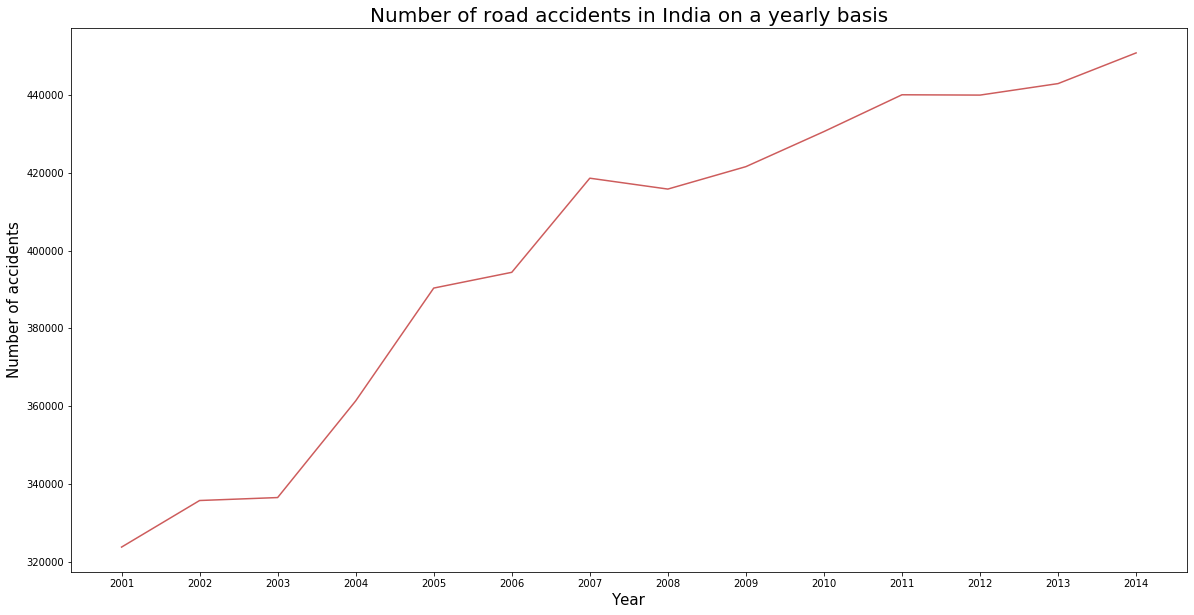

In [15]:
plt.figure(figsize=(20,10))

plt.plot(df_year['YEAR'],df_year['Total'], color='indianred')
plt.title('Number of road accidents in India on a yearly basis',size=20)
plt.xlabel('Year',size=15)
plt.ylabel('Number of accidents',size=15)
plt.xticks(np.arange(2001,2015,1),size=10)

The above data shows that there is a positive increase of road accidents each year.

([<matplotlib.axis.YTick at 0x1a2ec5d790>,
 <a list of 11 Text yticklabel objects>)

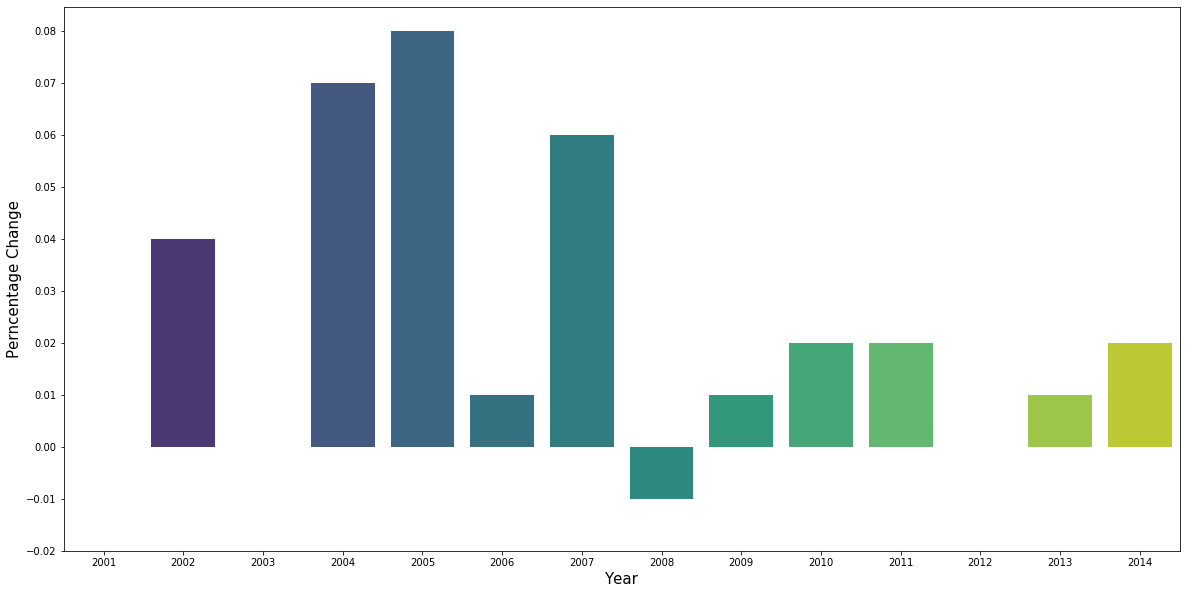

In [16]:
plt.figure(figsize=(20,10))
sns.barplot(x=df_year['YEAR'],y=df_year['Percentage change'],palette='viridis')
plt.xlabel('Year',size=15)
plt.ylabel('Perncentage Change',size=15)
plt.yticks(np.arange(-0.02,0.09,0.01))

From the above plots, it can be seen that apart from the year 2008, every other has recorded an increase or the same number of accidents in the country 

([<matplotlib.axis.XTick at 0x1a30288d10>,
 <a list of 14 Text xticklabel objects>)

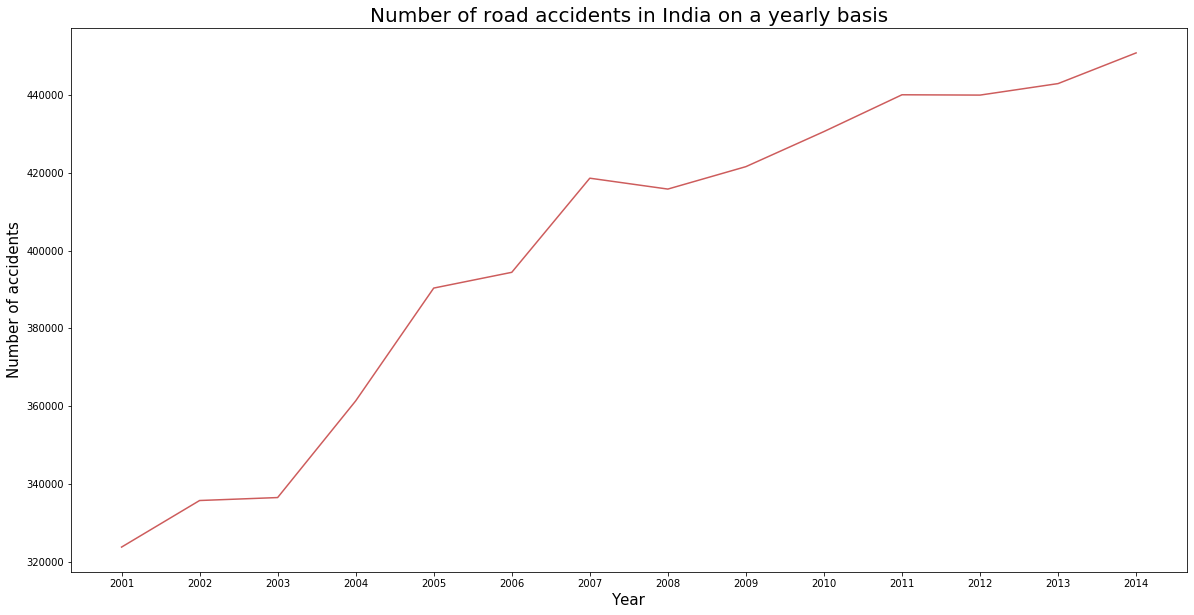

In [23]:
plt.figure(figsize=(20,10))

plt.plot(df_year['YEAR'],df_year['Total'], color='indianred')
plt.title('Number of road accidents in India on a yearly basis',size=20)
plt.xlabel('Year',size=15)
plt.ylabel('Number of accidents',size=15)
plt.xticks(np.arange(2001,2015,1),size=10)

In [21]:
from sklearn.linear_model import LinearRegression


In [28]:
x_matrix=df_year['YEAR'].values.reshape(-1,1)
y=df_year['Total'].values

In [29]:
reg=LinearRegression()
reg.fit(x_matrix,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
reg.intercept_

-19883660.67032967

In [32]:
reg.coef_

array([10104.04395604])

In [54]:
regression=[]
a=np.arange(2015,2025)
for year in a:
    year=np.array([year])
    year=year.reshape(1,-1)
    regression.append(reg.predict(year))

In [58]:
df_predicted=pd.DataFrame(regression)

In [62]:
df_predicted=df_predicted.rename(columns={0:'Total'})

In [73]:
df_predicted.reset_index(drop=True,inplace=True)

In [74]:
years=np.arange(2015,2025,1)

In [75]:
df_temp=pd.DataFrame(years)
df_temp

,0
0,2015
1,2016
2,2017
3,2018
4,2019
5,2020
6,2021
7,2022
8,2023
9,2024


In [76]:
df_predicted['Year']=df_temp

In [79]:
df_predicted=df_predicted[['Year','Total']]

In [90]:
df_predicted['Total']=df_predicted['Total'].values.round(0)
df_predicted.index=df_predicted.index+1
df_predicted

,Year,Total
1,2015,475988.0
2,2016,486092.0
3,2017,496196.0
4,2018,506300.0
5,2019,516404.0
6,2020,526508.0
7,2021,536612.0
8,2022,546716.0
9,2023,556820.0
10,2024,566924.0


Using linear regression of the past data from 2001-2014, we can predict the values of future years as given above.

In [92]:
df_location=pd.read_csv('Road accidents data/Acc_classified_according_to_Type_of_Location_2014_and_2016.csv')

In [94]:
df_location.head()

,S. No.,State/ UT,Near School or College - Total Acc. - 2014,Near School or College - Persons Killed - 2014,Near School or College - Persons Injured - 2014,Near or inside a village - Total Acc. - 2014,Near or inside a village - Persons Killed - 2014,Near or inside a village - Persons Injured - 2014,Near a Factory/Industrial area - Total Acc. - 2014,Near a Factory/Industrial area - Persons Killed - 2014,...,Near Petrol Pump - Persons Injured - 2016,Near Bus Stand - Total Accidents - 2016,Near Bus Stand - Persons Killed - 2016,Near Bus Stand - Persons Injured - 2016,Near or on Road under Construction - Total Accidents - 2016,Near or on Road under Construction - Persons Killed - 2016,Near or on Road under Construction - Persons Injured - 2016,Open Area - Total Accidents - 2016,Open Area - Persons Killed - 2016,Open Area - Persons Injured - 2016
0,1,Andhra Pradesh,1110.0,301.0,1486.0,3782.0,1255.0,4762.0,830.0,277.0,...,1030,1151,373,1409,389,199,572,9912.0,3486,12723
1,2,Arunachal Pradesh,23.0,8.0,48.0,0.0,0.0,0.0,0.0,0.0,...,13,3,0,11,15,16,39,78.0,50,53
2,3,Assam,409.0,157.0,348.0,792.0,296.0,716.0,364.0,123.0,...,254,367,114,285,254,69,231,2614.0,955,2220
3,4,Bihar,699.0,342.0,517.0,2050.0,1064.0,1443.0,349.0,161.0,...,232,336,197,250,272,130,179,2806.0,1839,1930
4,5,Chhattisgarh,577.0,162.0,579.0,3444.0,1160.0,3470.0,658.0,220.0,...,445,438,111,409,396,97,340,5716.0,1982,5837


In [109]:
df_location_updated=df_location.iloc[:,47:]
df_location_updated.head()


,Near School/College/any other educational Institutes - Total Accidents - 2016,Near School/College/any other educational Institutes - Persons Killed - 2016,Near School/College/any other educational Institutes - Persons Injured - 2016,Pedestrian crossing - Total Accidents - 2016,Pedestrian crossing - Persons Killed - 2016,Pedestrian crossing - Persons Injured - 2016,Market Place - Total Accidents - 2016,Market Place - Persons Killed - 2016,Market Place - Persons Injured - 2016,Near Office Complex - Total Accidents - 2016,...,Near Petrol Pump - Persons Injured - 2016,Near Bus Stand - Total Accidents - 2016,Near Bus Stand - Persons Killed - 2016,Near Bus Stand - Persons Injured - 2016,Near or on Road under Construction - Total Accidents - 2016,Near or on Road under Construction - Persons Killed - 2016,Near or on Road under Construction - Persons Injured - 2016,Open Area - Total Accidents - 2016,Open Area - Persons Killed - 2016,Open Area - Persons Injured - 2016
0,1393,451,1604,2026,777,2269,842,272,1016,844,...,1030,1151,373,1409,389,199,572,9912.0,3486,12723
1,15,9,37,10,3,31,18,0,27,17,...,13,3,0,11,15,16,39,78.0,50,53
2,488,153,334,505,174,406,667,235,464,326,...,254,367,114,285,254,69,231,2614.0,955,2220
3,667,369,444,573,340,308,787,420,589,196,...,232,336,197,250,272,130,179,2806.0,1839,1930
4,648,155,587,320,81,282,1027,280,874,595,...,445,438,111,409,396,97,340,5716.0,1982,5837


In [137]:
df_month=pd.read_csv('Road accidents data/only_road_accidents_data_month2.csv')

In [138]:
df_month.head()

,STATE/UT,YEAR,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
0,A & N Islands,2001,8,23,15,15,14,19,14,19,7,12,13,22,181
1,A & N Islands,2002,12,10,14,16,10,7,16,11,23,21,11,17,168
2,A & N Islands,2003,19,13,15,13,13,12,8,16,17,25,14,15,180
3,A & N Islands,2004,21,14,22,17,13,18,16,19,16,20,15,24,215
4,A & N Islands,2005,19,21,22,17,13,19,21,14,15,19,10,16,206


In [139]:
i=0
for year in df_month['YEAR']:
    if year==2014:
        i+=1
    else:
        df_month=df_month.drop(i)
        i+=1

In [140]:
df_month.reset_index(drop=True)

,STATE/UT,YEAR,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
0,A & N Islands,2014,25,13,19,19,18,15,15,16,15,23,18,22,218
1,Andhra Pradesh,2014,3809,3657,3641,3582,3986,3664,3167,3587,3225,3410,3346,4158,43232
2,Arunachal Pradesh,2014,28,10,10,21,9,12,13,14,14,15,22,17,185
3,Assam,2014,658,615,689,612,566,531,573,528,460,670,638,604,7144
4,Bihar,2014,777,742,852,714,985,1002,757,662,685,720,829,806,9531
5,Chandigarh,2014,35,22,31,40,32,25,22,32,38,31,28,30,366
6,Chhattisgarh,2014,1167,1110,1000,1020,1149,1051,934,877,910,1005,973,944,12140
7,D&N Haveli,2014,6,7,7,10,9,4,8,7,7,8,8,6,87
8,Daman & Diu,2014,6,4,3,3,2,2,0,5,1,5,2,6,39
9,Delhi Ut,2014,643,698,801,632,661,658,624,744,742,687,720,700,8310


In [142]:
df_month_top=df_month[df_month['TOTAL']>20000]
df_month_top

,STATE/UT,YEAR,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
27,Andhra Pradesh,2014,3809,3657,3641,3582,3986,3664,3167,3587,3225,3410,3346,4158,43232
167,Gujarat,2014,2023,1978,2039,1846,2127,1988,1673,1633,1506,1817,1678,1844,22152
237,Karnataka,2014,3915,3649,3805,3577,4053,3772,3421,3428,3254,3517,3442,3861,43694
251,Kerala,2014,3332,2909,3005,2785,3162,2805,2834,2913,2911,2911,2963,3342,35872
279,Madhya Pradesh,2014,3375,3154,3470,3345,4107,3637,3104,2951,2946,3261,3288,3060,39698
293,Maharashtra,2014,3978,3714,3920,3847,4258,3784,3546,3450,3298,3291,3478,3818,44382
405,Rajasthan,2014,2143,1951,2130,2053,2484,2213,1976,1888,1839,2035,2104,1823,24639
433,Tamil Nadu,2014,5658,5293,5824,5303,5711,5915,5719,5936,5777,5516,5036,5562,67250
461,Uttar Pradesh,2014,2550,2311,2217,2067,2265,2209,2086,2017,1824,2023,2170,2325,26064


Text(0.5, 1.0, 'States with highest accidents in 2014')

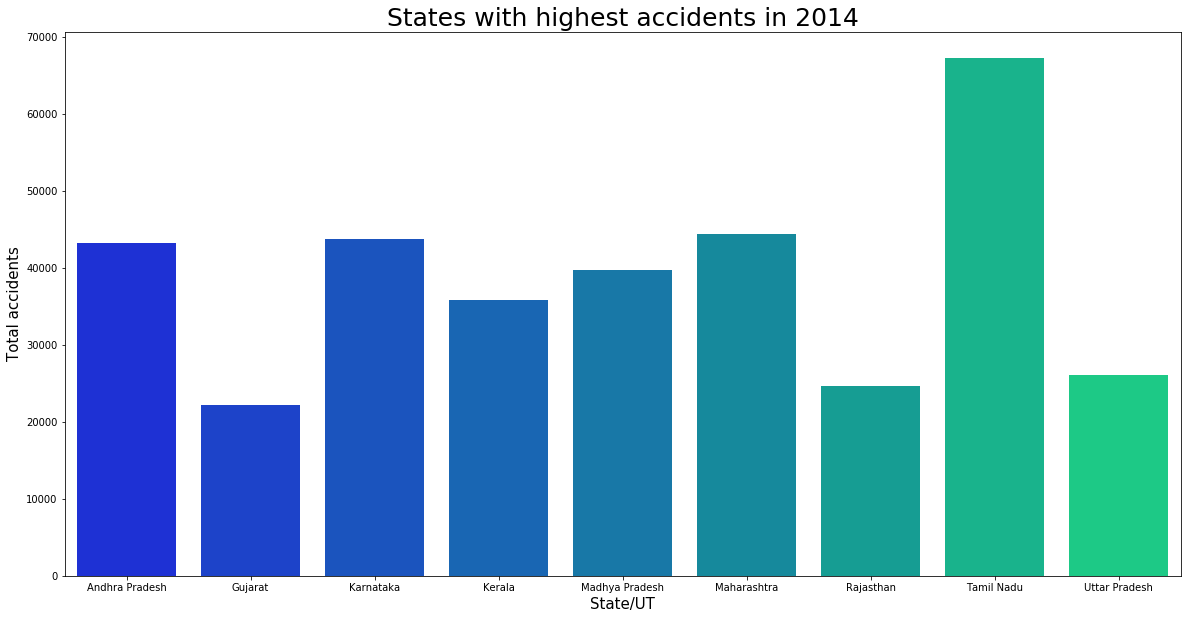

In [601]:
plt.figure(figsize=(20,10))
sns.barplot(x='STATE/UT',y='TOTAL',data=df_month_top,palette='winter')
plt.xlabel('State/UT',size=15)
plt.ylabel('Total accidents',size=15)
plt.title('States with highest accidents in 2014',size=25)

As we see, like each year, Tamil Nadu records highest number of road accidents by a large margin.

In [166]:
df_tamil_nadu=df_month.loc[df_month['STATE/UT'].isin(['Tamil Nadu'])]
df_karnataka=df_month.loc[df_month['STATE/UT'].isin(['Karnataka'])]
df_maharashtra=df_month.loc[df_month['STATE/UT'].isin(['Maharashtra'])]
df_delhi=df_month.loc[df_month['STATE/UT'].isin(['Delhi Ut'])]

In [167]:
df_tamil_nadu

,STATE/UT,YEAR,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
433,Tamil Nadu,2014,5658,5293,5824,5303,5711,5915,5719,5936,5777,5516,5036,5562,67250


In [168]:
df_delhi

,STATE/UT,YEAR,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
139,Delhi Ut,2014,643,698,801,632,661,658,624,744,742,687,720,700,8310


In [169]:
df_karnataka

,STATE/UT,YEAR,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
237,Karnataka,2014,3915,3649,3805,3577,4053,3772,3421,3428,3254,3517,3442,3861,43694


In [170]:
df_maharashtra

,STATE/UT,YEAR,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,TOTAL
293,Maharashtra,2014,3978,3714,3920,3847,4258,3784,3546,3450,3298,3291,3478,3818,44382


([<matplotlib.axis.XTick at 0x1a34eb9f50>,
 <a list of 12 Text xticklabel objects>)

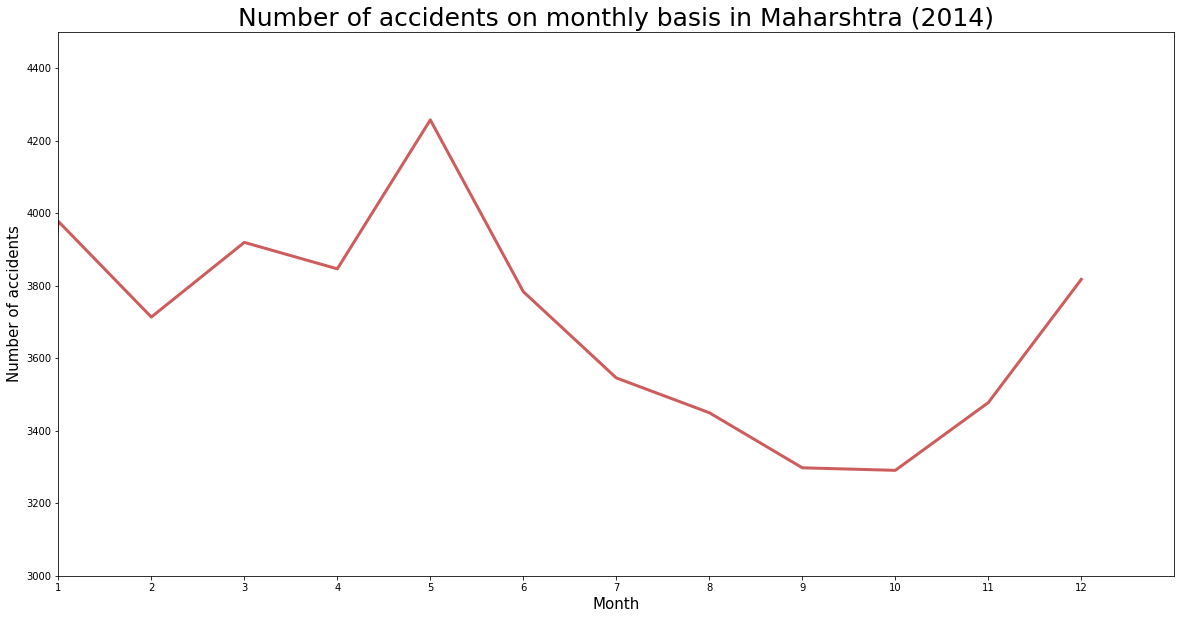

In [323]:
plt.figure(figsize=(20,10))
val=df_maharashtra.iloc[:,1:14].values
plt.plot(val[0],color='indianred',linewidth=3)
plt.xlim(1,13)
plt.ylim(3000,4500)
plt.xlabel('Month',size=15)
plt.ylabel('Number of accidents',size=15)
plt.title('Number of accidents on monthly basis in Maharshtra (2014)',size=25)
plt.xticks(np.arange(1,13))

([<matplotlib.axis.XTick at 0x1a34dbffd0>,
 <a list of 12 Text xticklabel objects>)

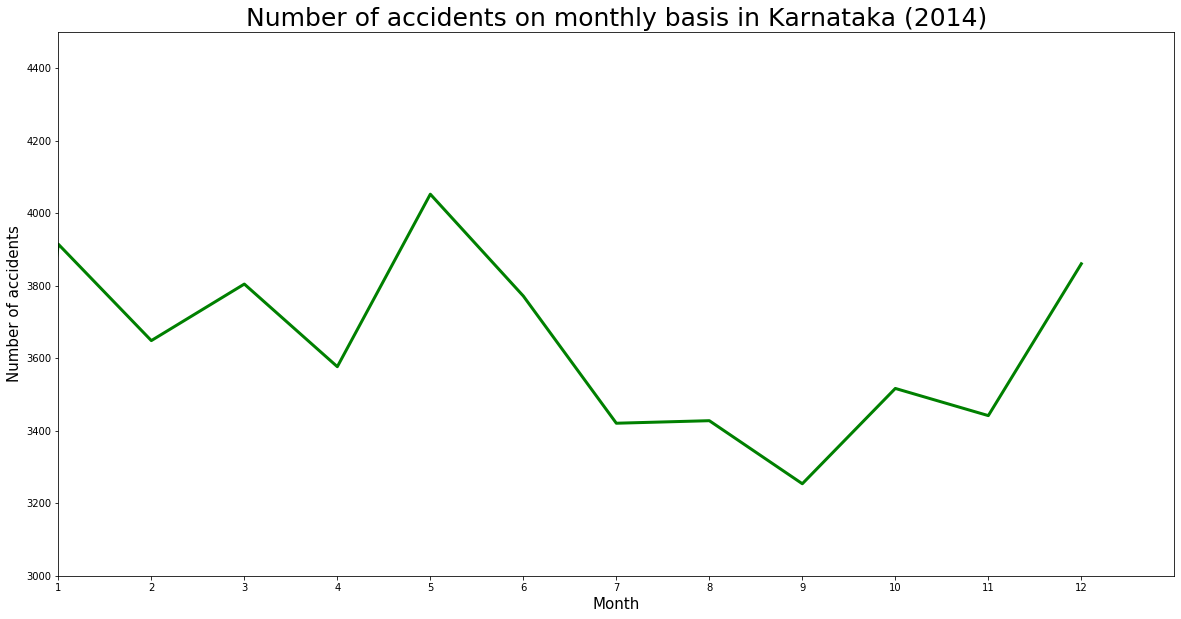

In [322]:
plt.figure(figsize=(20,10))
val=df_karnataka.iloc[:,1:14].values
plt.plot(val[0],color='green',linewidth=3)
plt.xlim(1,13)
plt.ylim(3000,4500)
plt.xlabel('Month',size=15)
plt.ylabel('Number of accidents',size=15)
plt.title('Number of accidents on monthly basis in Karnataka (2014)',size=25)
plt.xticks(np.arange(1,13))

In the states of Karnataka and Maharashtra, the accidents peak in the period of April to June. In the rainy seasons starting from first week of June, the accidents reduce. It could mean that drivers take greater precaution during the rains than the dry season.

Text(0.5, 1.0, 'Number of accidents on monthly basis in Tamil Nadu (2014)')

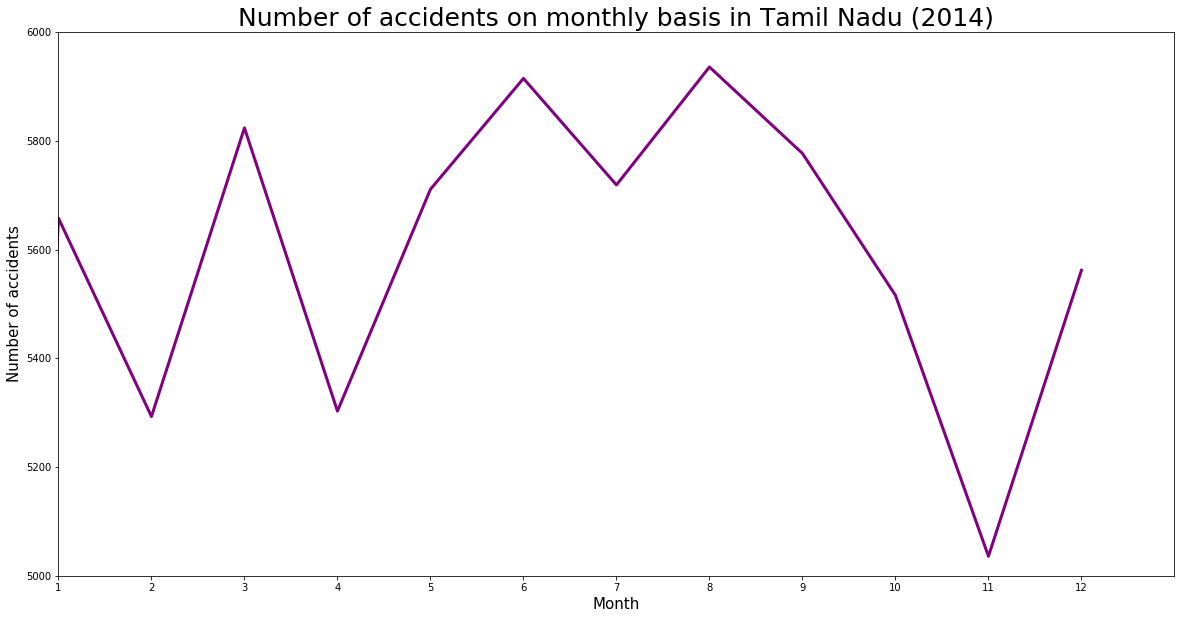

In [371]:
plt.figure(figsize=(20,10))
val=df_tamil_nadu.iloc[:,1:14].values
plt.plot(val[0],color='purple',linewidth=3)
plt.xlim(1,13)
plt.ylim(5000,6000)
plt.xticks(np.arange(1,13))
plt.xlabel('Month',size=15)
plt.ylabel('Number of accidents',size=15)
plt.title('Number of accidents on monthly basis in Tamil Nadu (2014)',size=25)


In Tamil Nadu aswell, the accidents become lowest during the peak rainy months which last from October to December.

([<matplotlib.axis.XTick at 0x1a41313d90>,
 <a list of 12 Text xticklabel objects>)

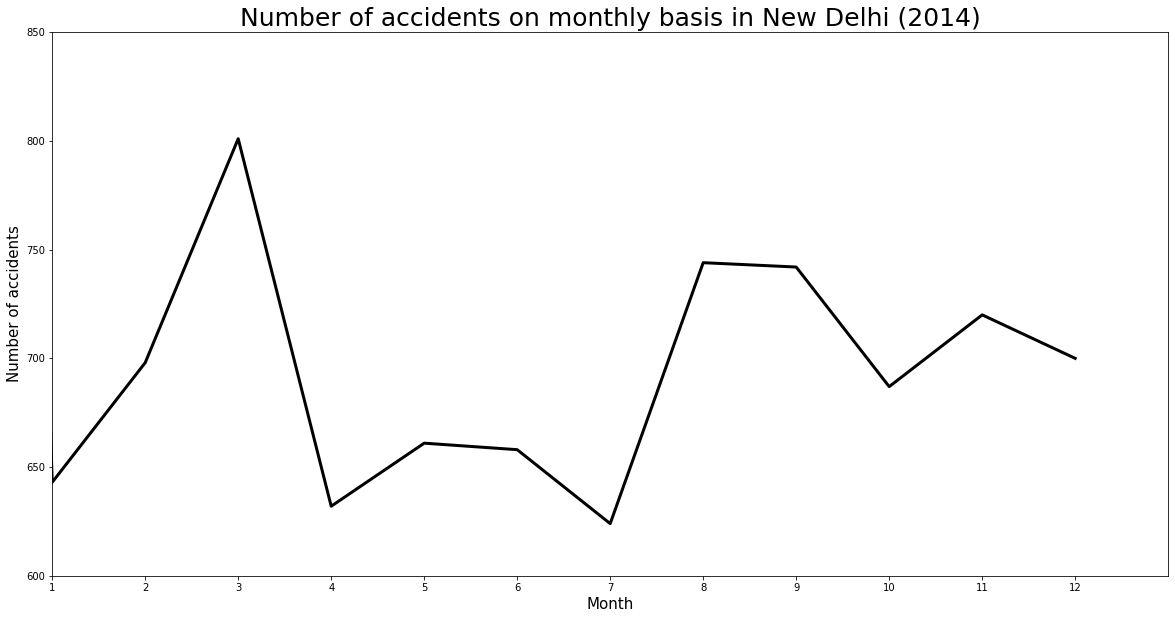

In [370]:
plt.figure(figsize=(20,10))
val=df_delhi.iloc[:,1:14].values
plt.plot(val[0],color='black',linewidth=3)
plt.xlim(1,13)
plt.ylim(600,850)
plt.xlabel('Month',size=15)
plt.ylabel('Number of accidents',size=15)
plt.title('Number of accidents on monthly basis in New Delhi (2014)',size=25)
plt.xticks(np.arange(1,13))

In New Delhi, accidents seem to peak early in the year. As expected, the accidents during the rainy season from June to July are low. However, a sharp increase does take place in August.

In [340]:
df_hedu=pd.read_csv('Road accidents data/Accidents_Acc_EduQual_Drivers_above_10_Standard_09-16.csv')
df_hedu

,States/UTs,2009,2010,2011,2012,2013,2014,2015,2016
0,Andhra Pradesh,9826.0,7849.0,20150.0,8144.0,12902.0,10485.0,13022.0,10540.0
1,Arunachal Pradesh,96.0,89.0,86.0,87.0,84.0,83.0,88.0,71.0
2,Assam,2070.0,NaN,NaN,NaN,2075.0,2629.0,2240.0,1708.0
3,Bihar,2447.0,3084.0,3810.0,3722.0,3737.0,3826.0,3940.0,2061.0
4,Chhattisgarh,3605.0,4569.0,4934.0,3571.0,3660.0,4628.0,6686.0,6827.0
5,Goa,1934.0,2034.0,2215.0,2184.0,2369.0,2286.0,2261.0,1528.0
6,Gujarat,8687.0,9611.0,9446.0,7132.0,9939.0,8012.0,8474.0,7896.0
7,Haryana,4854.0,4682.0,4636.0,4112.0,4202.0,4177.0,4512.0,2771.0
8,Himachal Pradesh,1363.0,1317.0,717.0,977.0,1675.0,1809.0,2046.0,487.0
9,Jammu & Kashmir,1024.0,1458.0,861.0,434.0,1267.0,1020.0,1040.0,611.0


In [330]:
df_ledu=pd.read_csv('Road accidents data/Accidents_Classified_Acc_To_EduQual_Of_Drivers_9-10_standard-09-16.csv')

In [331]:
df_ledu.head()

,States/UTs,2009,2010,2011,2012,2013,2014,2015,2016
0,Andhra Pradesh,9882.0,8040.0,13550.0,8657.0,17170.0,7941.0,6333.0,7111.0
1,Arunachal Pradesh,107.0,90.0,113.0,76.0,131.0,61.0,104.0,69.0
2,Assam,1704.0,NaN,NaN,NaN,2554.0,2547.0,2498.0,2936.0
3,Bihar,3273.0,5200.0,4136.0,3938.0,3761.0,3643.0,2981.0,2400.0
4,Chhattisgarh,6017.0,5994.0,6197.0,7052.0,7071.0,5041.0,5134.0,3626.0


In [341]:
df_hedu_updated=df_hedu.loc[:,['States/UTs','2016']]

In [342]:
df_hedu_updated=df_hedu_updated.rename(columns={'2016':'10th pass'})

In [343]:
df_hedu_updated

,States/UTs,10th pass
0,Andhra Pradesh,10540.0
1,Arunachal Pradesh,71.0
2,Assam,1708.0
3,Bihar,2061.0
4,Chhattisgarh,6827.0
5,Goa,1528.0
6,Gujarat,7896.0
7,Haryana,2771.0
8,Himachal Pradesh,487.0
9,Jammu & Kashmir,611.0


In [346]:
df_ledu_updated=df_ledu.loc[:,['2016']]

In [347]:
df_ledu_updated=df_ledu_updated.rename(columns={'2016': '10th Fail'})
df_ledu_updated

,10th Fail
0,7111.0
1,69.0
2,2936.0
3,2400.0
4,3626.0
5,2083.0
6,8086.0
7,2717.0
8,2180.0
9,780.0


In [385]:
df_education=df_hedu_updated.copy()

In [386]:
df_education['10th fail']=df_ledu_updated

In [387]:
df_education.dropna(axis=0,inplace=True)
df_education.drop(36,inplace=True)

Text(0.5, 0, 'State/UT')

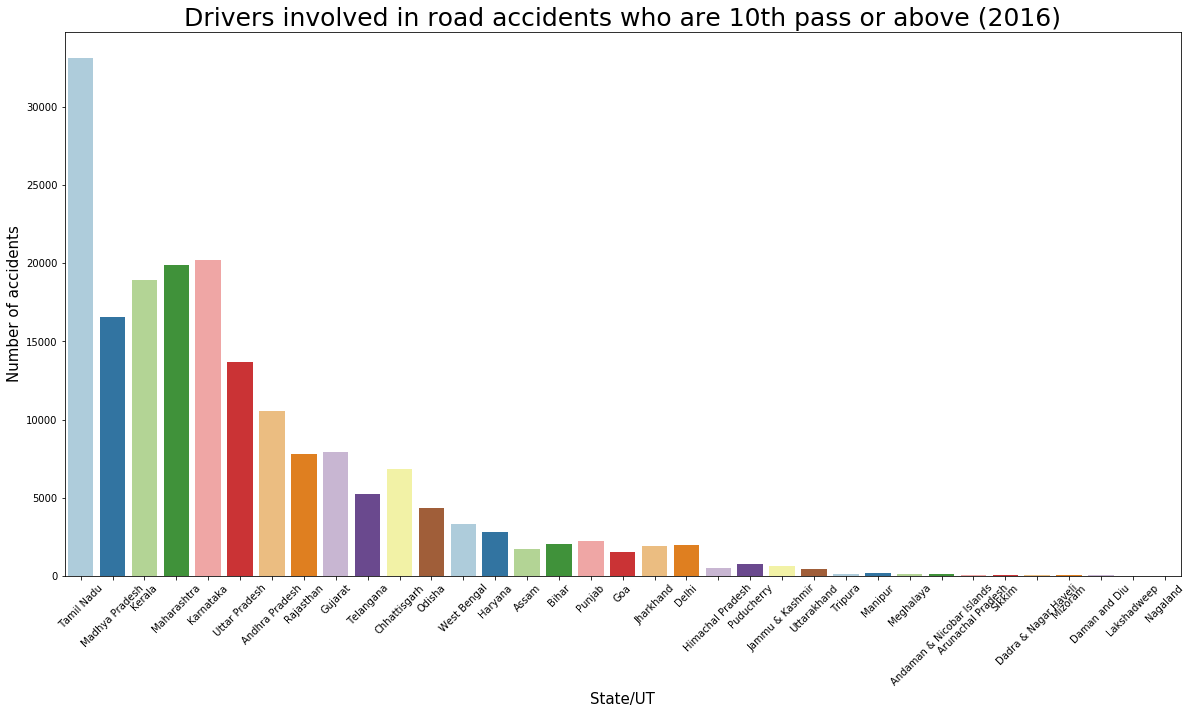

In [402]:
plt.figure(figsize=(20,10))
sns.barplot(x=df_education['States/UTs'],y=df_education['10th pass'],palette='Paired')
plt.xticks(rotation=45,size=10)
plt.title('Drivers involved in road accidents who are 10th pass or above (2016)',size=25)
plt.ylabel('Number of accidents',size=15)
plt.xlabel('State/UT',size=15)

Text(0.5, 0, 'State/UT')

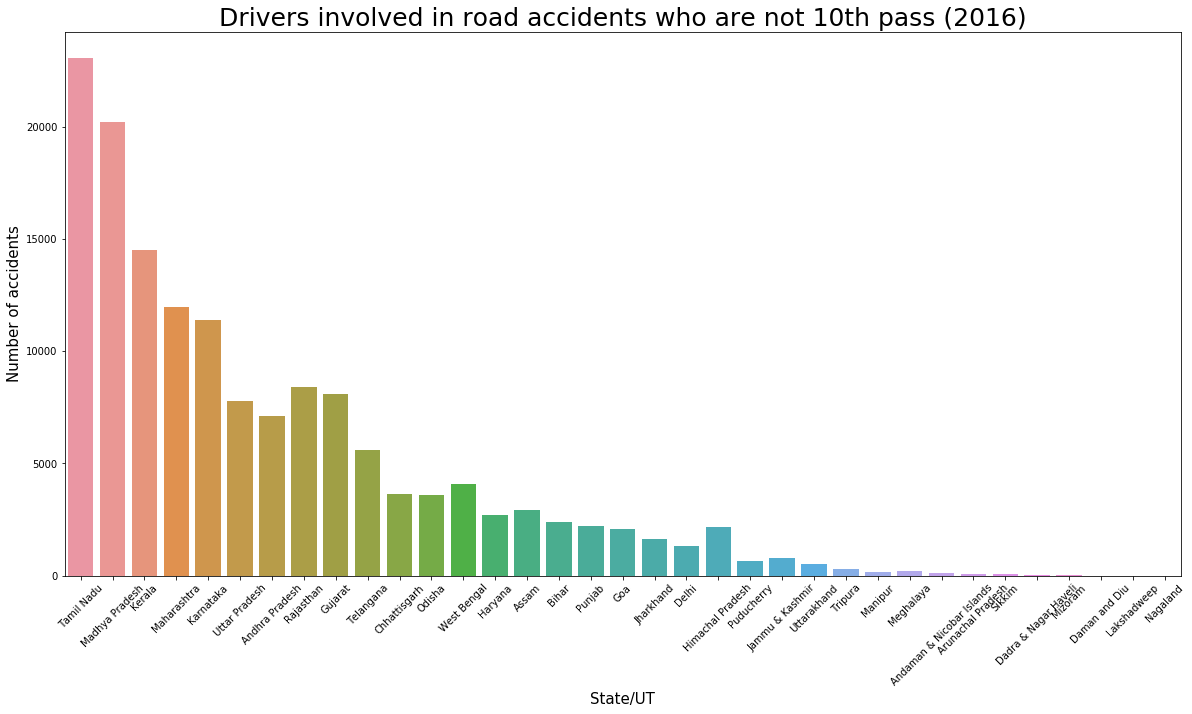

In [398]:
plt.figure(figsize=(20,10))
sns.barplot(x=df_education['States/UTs'],y=df_education['10th fail'])
plt.xticks(rotation=45,size=10)
plt.title('Drivers involved in road accidents who are not 10th pass (2016)',size=25)
plt.ylabel('Number of accidents',size=15)
plt.xlabel('State/UT',size=15)

From the above visualisations, it is observed that education plays little role in driver accidents. In Tamil Nadu, under both 10th pass and 10th fail criteria, the accidents are higher. The case is similar for most of the states. However, the cases in the North East states is extremely low even with limited road development due to it's challenging topological conditions.

In [390]:
df_education['Total accidents']=df_education['10th pass']+df_education['10th fail']
df_education.head()

,States/UTs,10th pass,10th fail,Total accidents
0,Andhra Pradesh,10540.0,7111.0,17651.0
1,Arunachal Pradesh,71.0,69.0,140.0
2,Assam,1708.0,2936.0,4644.0
3,Bihar,2061.0,2400.0,4461.0
4,Chhattisgarh,6827.0,3626.0,10453.0


In [397]:
df_education=df_education.sort_values(by='Total accidents',ascending=False)

In [418]:
df_age=pd.read_csv('Road accidents data/No_of_Road_Acc_acco_to_clf_of_age_of_Driver_2014_2016.csv')
df_age.head()

,S. No.,State/ UT,0-14,15-24,25-64,64 above,Age Less than 18 years - Fatal - 2016,Age Less than 18 years - Total - 2016,Age 18-25 - Fatal - 2016,Age 18-25 - Total - 2016,Age 25-35 - Fatal - 2016,Age 25-35 - Total - 2016,Age 35-45 - Fatal - 2016,Age 35-45 - Total - 2016,Age 45-60 - Fatal - 2016,Age 45-60 - Total - 2016,Age 60 and Above - Fatal - 2016,Age 60 and Above - Total - 2016,Age Age not known - Fatal - 2016,Age Age not known - Total - 2016
0,1,Andhra Pradesh,136,1812,4621,496,91,436,1682,5751,2148,7034,2316,6641,1057,3245,150,416,407,1365
1,2,Arunachal Pradesh,0,30,16,0,11,32,22,71,21,47,19,35,14,35,0,0,16,29
2,3,Assam,0,252,237,0,84,269,765,2774,796,2188,486,1426,183,439,131,339,0,0
3,4,Bihar,70,561,698,108,557,1144,1244,2318,941,1807,724,1281,391,740,65,129,503,803
4,5,Chhattisgarh,0,432,1113,0,81,300,778,3120,1127,4209,712,2913,383,1522,53,268,393,1248


In [419]:
df_age_2014=df_age.iloc[:,0:6]
df_age_2014.drop('S. No.',axis=1,inplace=True)

In [435]:
#df_age_2014.drop(36,inplace=True)
df_age_2014.dropna(axis=1,inplace=True)

Text(0, 0.5, 'Number of accidents')

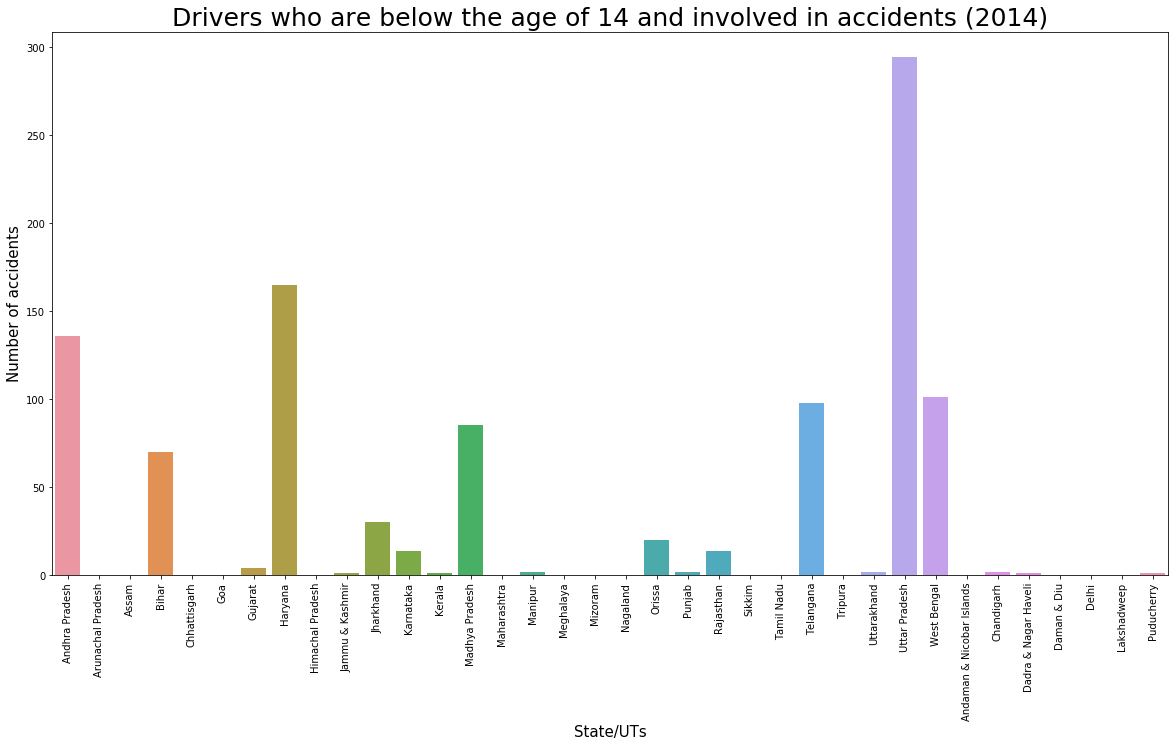

In [439]:
plt.figure(figsize=(20,10))
sns.barplot(x='State/ UT',y='0-14',data=df_age_2014)
plt.xticks(rotation=90)
plt.title('Drivers who are below the age of 14 and involved in accidents (2014)',size=25)
plt.xlabel('State/UTs',size=15)
plt.ylabel('Number of accidents',size=15)

From the above visualisation, the under age driving causing road accidents is extremely severe in Uttar Pradesh. Haryana,Telangana, West Bengal,Andhra Pradesh,Bihar,MP are also notable mentions. Under age driving punishments aren't enforced as strictly in these states as in other states.

Text(0, 0.5, 'Number of accidents')

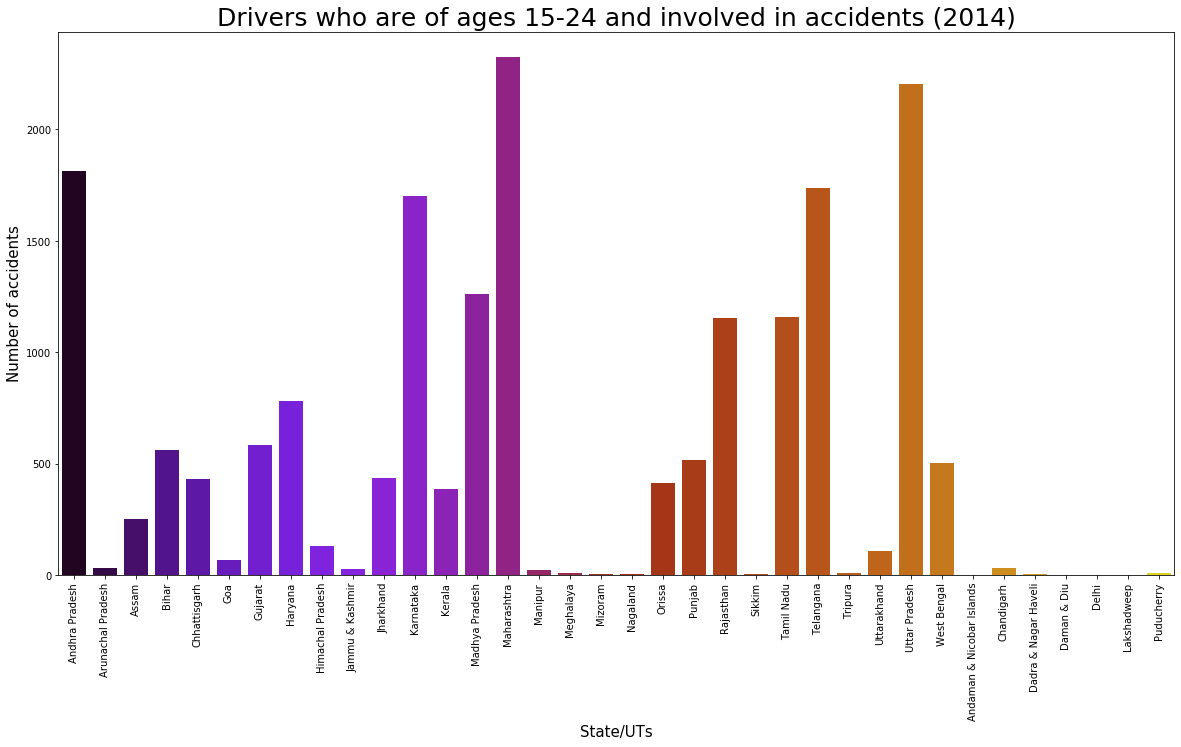

In [446]:
plt.figure(figsize=(20,10))
sns.barplot(x='State/ UT',y='15-24',data=df_age_2014,palette='gnuplot')
plt.xticks(rotation=90)
plt.title('Drivers who are of ages 15-24 and involved in accidents (2014)',size=25)
plt.xlabel('State/UTs',size=15)
plt.ylabel('Number of accidents',size=15)

Between the ages of 15-24, most of the accidents are from Maharashtra and UP. Telangana, Andhra Pradesh, Karnataka are also a notable mention. This age group generally comprises of school going senior students or college students who use 2 wheelers. Speeding is one of the major reasons for these accidents.

Text(0, 0.5, 'Number of accidents')

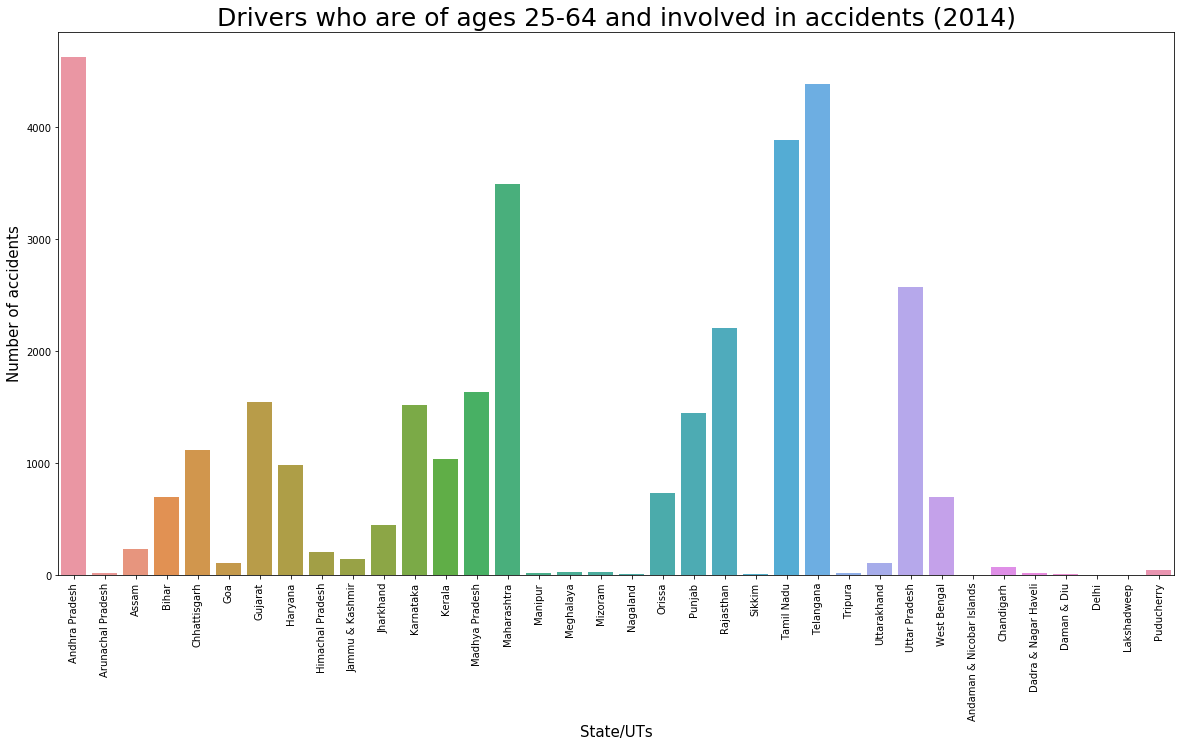

In [442]:
plt.figure(figsize=(20,10))
sns.barplot(x='State/ UT',y='25-64',data=df_age_2014)
plt.xticks(rotation=90)
plt.title('Drivers who are of ages 25-64 and involved in accidents (2014)',size=25)
plt.xlabel('State/UTs',size=15)
plt.ylabel('Number of accidents',size=15)

Amongst the middle aged and retiring aged people, Andhra Pradesh , Telangana, Tamil Nadu , Maharashtra have high cases of accidents.

Text(0, 0.5, 'Number of accidents')

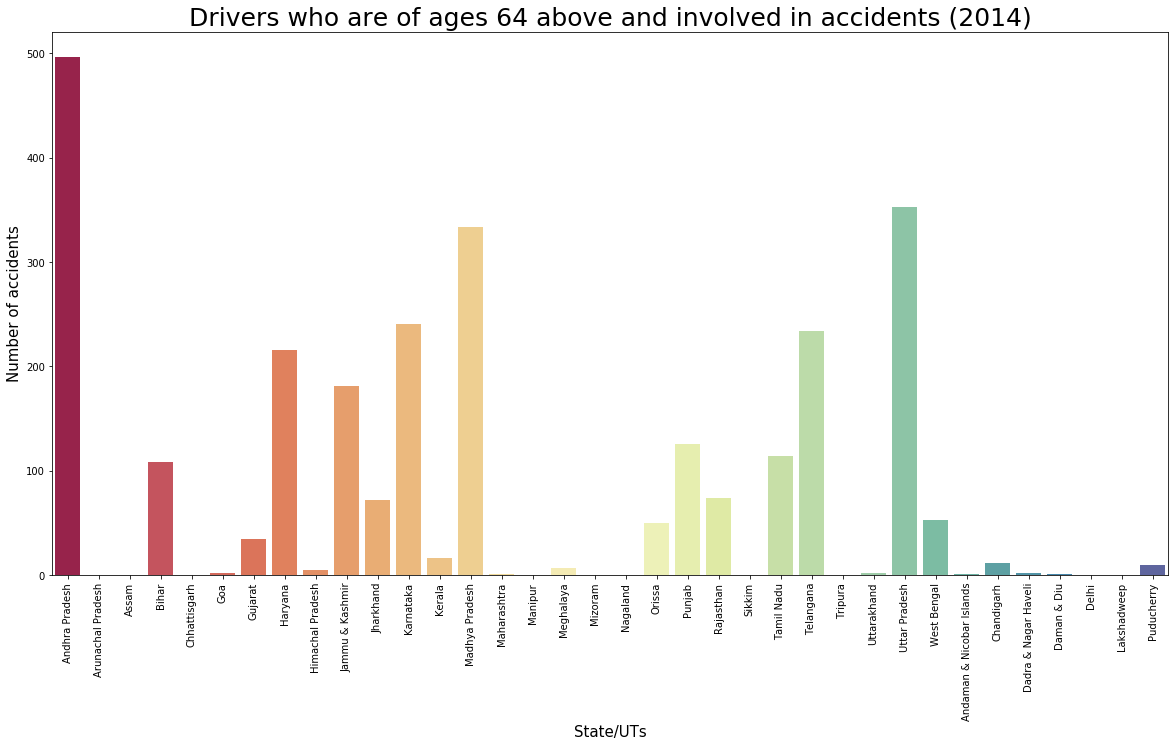

In [445]:
plt.figure(figsize=(20,10))
sns.barplot(x='State/ UT',y='64 above',data=df_age_2014,palette='Spectral')
plt.xticks(rotation=90)
plt.title('Drivers who are of ages 64 above and involved in accidents (2014)',size=25)
plt.xlabel('State/UTs',size=15)
plt.ylabel('Number of accidents',size=15)

Amongst the senior citizens aswell, Andhra Pradesh records the highest cases followed by MP and UP. States having strong public transport systems such as metros and buses show low accident rates for senior citizens since they prefer it over driving themselves.

In [449]:
df_Andhra=df_age_2014.iloc[0:1,:]

In [452]:
df_Andhra

,State/ UT,0-14,15-24,25-64,64 above
0,Andhra Pradesh,136,1812,4621,496


In [512]:
unstack_df=df_Andhra.unstack()

In [513]:
unstack_df.reset_index(drop=True,inplace=True)

In [518]:
list1=[]
for i in range(1,5):
    list1.append(unstack_df[i])
    i+=1
    

In [520]:
labels=['0-14','15-24','25-64','64 above']

Text(0.5, 1.0, 'Road accidents in Andhra Pradesh by age groups (2014)')

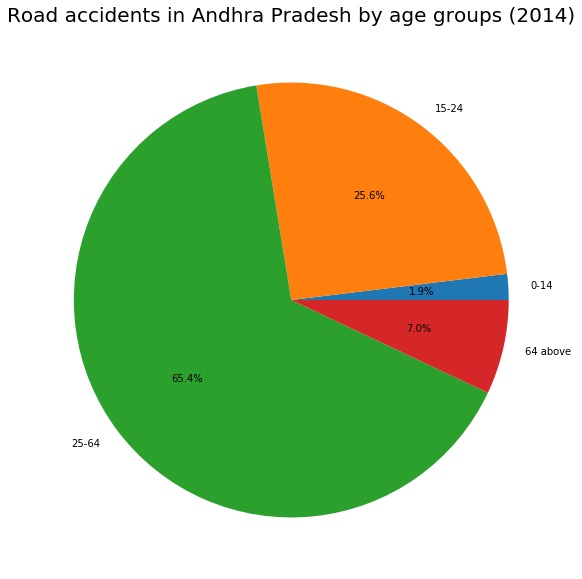

In [530]:
plt.figure(figsize=(10,10))
plt.pie(list1,labels=labels,autopct='%1.1f%%')
plt.title('Road accidents in Andhra Pradesh by age groups (2014)',size=20)

In [559]:

df_maha=df_maha.loc[14:14,:]

In [560]:
df_maha

,State/ UT,0-14,15-24,25-64,64 above
14,Maharashtra,0,2323,3490,1


In [562]:
unstack_df=df_maha.unstack()

unstack_df.reset_index(drop=True,inplace=True)

list1=[]
for i in range(1,5):
    list1.append(unstack_df[i])
    i+=1

Text(0.5, 1.0, 'Road accidents in Maharashtra by age groups (2014)')

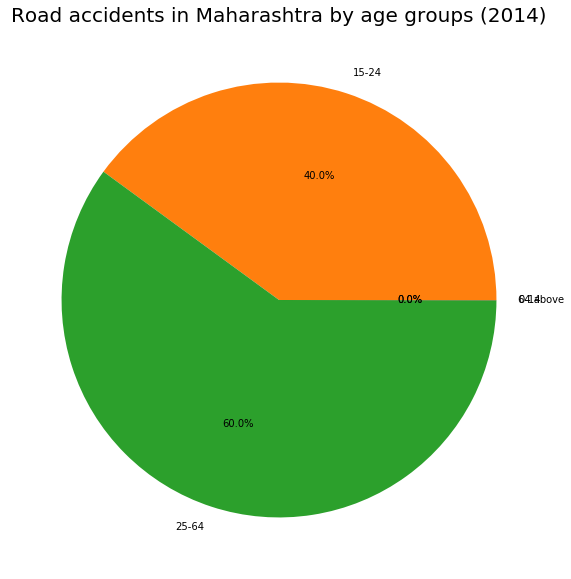

In [563]:
plt.figure(figsize=(10,10))
plt.pie(list1,labels=labels,autopct='%1.1f%%')
plt.title('Road accidents in Maharashtra by age groups (2014)',size=20)

In Maharashtra, no accidents are caused by underage driving or by senior citizens. This indicates strict traffic and police regulations against under age driving.

In [583]:
df_Kar=df_age_2014.copy()
df_Kar

,State/ UT,0-14,15-24,25-64,64 above
0,Andhra Pradesh,136,1812,4621,496
1,Arunachal Pradesh,0,30,16,0
2,Assam,0,252,237,0
3,Bihar,70,561,698,108
4,Chhattisgarh,0,432,1113,0
5,Goa,0,69,112,2
6,Gujarat,4,584,1544,35
7,Haryana,165,780,982,216
8,Himachal Pradesh,0,130,206,5
9,Jammu & Kashmir,1,26,142,181


In [584]:
df_Kar=df_Kar.iloc[11:12,:]
df_Kar


,State/ UT,0-14,15-24,25-64,64 above
11,Karnataka,14,1700,1517,241


In [585]:
unstack_df=df_Kar.unstack()

In [588]:
unstack_df.reset_index(drop=True,inplace=True)

In [590]:
list1=[]
for i in range(1,5):
    list1.append(unstack_df[i])
    i+=1

Text(0.5, 1.0, 'Road accidents in Karnataka by age groups (2014)')

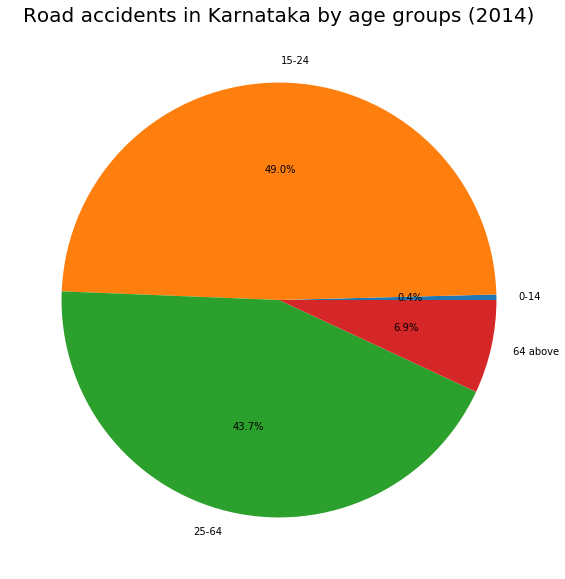

In [591]:
plt.figure(figsize=(10,10))
plt.pie(list1,labels=labels,autopct='%1.1f%%')
plt.title('Road accidents in Karnataka by age groups (2014)',size=20)

In [592]:
df_time=pd.read_csv('Road accidents data/only_road_accidents_data3.csv')
df_time.head()

,STATE/UT,YEAR,0-3 hrs. (Night),3-6 hrs. (Night),6-9 hrs (Day),9-12 hrs (Day),12-15 hrs (Day),15-18 hrs (Day),18-21 hrs (Night),21-24 hrs (Night),Total
0,A & N Islands,2001,2,6,29,40,39,40,18,7,181
1,A & N Islands,2002,2,6,22,41,33,33,23,8,168
2,A & N Islands,2003,2,8,31,35,28,36,25,15,180
3,A & N Islands,2004,2,5,29,42,43,43,37,14,215
4,A & N Islands,2005,0,8,27,28,38,42,50,13,206


In [594]:
df_time=df_time.reset_index(drop=True)
df_time.head()

,STATE/UT,YEAR,0-3 hrs. (Night),3-6 hrs. (Night),6-9 hrs (Day),9-12 hrs (Day),12-15 hrs (Day),15-18 hrs (Day),18-21 hrs (Night),21-24 hrs (Night),Total
0,A & N Islands,2001,2,6,29,40,39,40,18,7,181
1,A & N Islands,2002,2,6,22,41,33,33,23,8,168
2,A & N Islands,2003,2,8,31,35,28,36,25,15,180
3,A & N Islands,2004,2,5,29,42,43,43,37,14,215
4,A & N Islands,2005,0,8,27,28,38,42,50,13,206


In [597]:

df_time=df_time.loc[df_time['YEAR'].isin(['2014'])]

In [598]:
df_time

,STATE/UT,YEAR,0-3 hrs. (Night),3-6 hrs. (Night),6-9 hrs (Day),9-12 hrs (Day),12-15 hrs (Day),15-18 hrs (Day),18-21 hrs (Night),21-24 hrs (Night),Total
13,A & N Islands,2014,4,6,25,28,55,36,41,23,218
27,Andhra Pradesh,2014,3336,4466,4312,5631,5882,6669,7177,5759,43232
41,Arunachal Pradesh,2014,6,5,13,24,26,45,36,30,185
55,Assam,2014,212,277,939,1475,1225,1438,1023,555,7144
69,Bihar,2014,672,987,1429,1429,1460,1421,1262,871,9531
83,Chandigarh,2014,32,29,42,51,41,56,66,49,366
97,Chhattisgarh,2014,648,849,1469,1916,1702,2102,2072,1382,12140
111,D & N Haveli,2014,1,1,8,7,13,22,27,8,87
125,Daman & Diu,2014,3,0,4,6,5,7,12,2,39
139,Delhi (Ut),2014,757,581,867,925,909,1208,1502,1561,8310


In [607]:
df_time_top=df_time[df_time['Total']>40000]
df_time_top.reset_index(drop=True,inplace=True)

In [610]:
df_time_Andhra=df_time_top.loc[0:0,:]
df_time_Andhra


,STATE/UT,YEAR,0-3 hrs. (Night),3-6 hrs. (Night),6-9 hrs (Day),9-12 hrs (Day),12-15 hrs (Day),15-18 hrs (Day),18-21 hrs (Night),21-24 hrs (Night),Total
0,Andhra Pradesh,2014,3336,4466,4312,5631,5882,6669,7177,5759,43232


In [612]:
unstack_df=df_time_Andhra.unstack()
unstack_df.reset_index(drop=True,inplace=True)
unstack_df

0     Andhra Pradesh
1               2014
2               3336
3               4466
4               4312
5               5631
6               5882
7               6669
8               7177
9               5759
10             43232
dtype: object

In [613]:
labels=['0-3','3-6','6-9','9-12','12-15','15-18','18-21','21-24']

In [616]:
list1=[]
for i in range(2,10):
    list1.append(unstack_df[i])
    i+=1

Text(0.5, 1.0, 'Road accidents in Andhra Pradesh by time of accident in hrs (2014)')

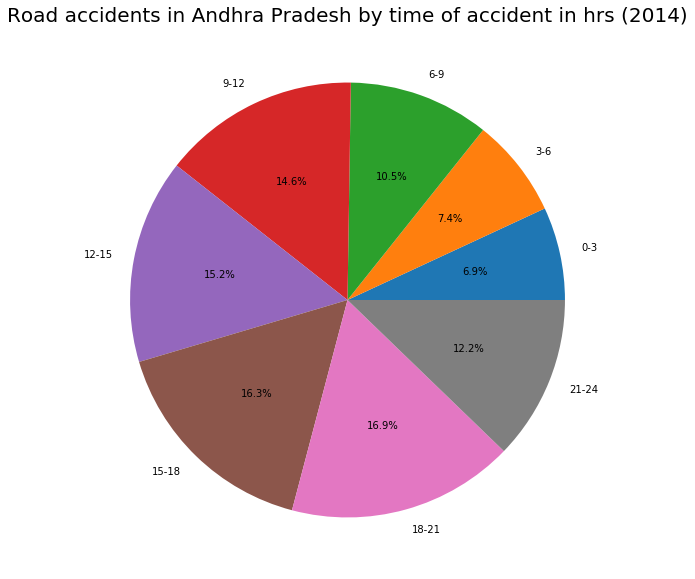

In [629]:
plt.figure(figsize=(10,10))
plt.pie(list1,labels=labels,autopct='%1.1f%%')
plt.title('Road accidents in Andhra Pradesh by time of accident in hrs (2014)',size=20)

From the above, it can be seen that the accidents occuring from 18-21 hrs is slightly higher. Most of the accidents occur after sunset when the visibility might be low. This means drivers are facing issues with inadequate lighting or rash fellow drivers. Strict police patrolling to maintain speed limits could definitely help reduce accidents.

In [625]:
df_time_Kar=df_time_top.loc[1:1,:]
df_time_Kar

unstack_df=df_time_Kar.unstack()
unstack_df.reset_index(drop=True,inplace=True)
unstack_df

0     Karnataka
1          2014
2          3022
3          3219
4          4576
5          6393
6          6646
7          7119
8          7377
9          5342
10        43694
dtype: object

In [626]:
list1=[]
for i in range(2,10):
    list1.append(unstack_df[i])
    i+=1

Text(0.5, 1.0, 'Road accidents in Karanataka by time of accident in hrs (2014)')

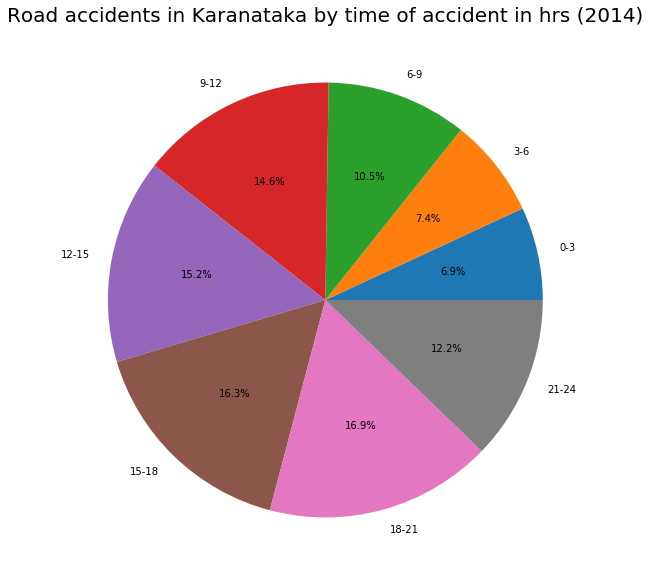

In [628]:
plt.figure(figsize=(10,10))
plt.pie(list1,labels=labels,autopct='%1.1f%%')
plt.title('Road accidents in Karanataka by time of accident in hrs (2014)',size=20)

In [631]:
df_time_TN=df_time_top.loc[3:3,:]
df_time_TN

,STATE/UT,YEAR,0-3 hrs. (Night),3-6 hrs. (Night),6-9 hrs (Day),9-12 hrs (Day),12-15 hrs (Day),15-18 hrs (Day),18-21 hrs (Night),21-24 hrs (Night),Total
3,Tamil Nadu,2014,2685,4057,7973,9593,9955,11902,13927,7158,67250


In [633]:
unstack_df=df_time_TN.unstack()
unstack_df.reset_index(drop=True,inplace=True)
unstack_df

0     Tamil Nadu
1           2014
2           2685
3           4057
4           7973
5           9593
6           9955
7          11902
8          13927
9           7158
10         67250
dtype: object

In [634]:
list1=[]
for i in range(2,10):
    list1.append(unstack_df[i])
    i+=1

Text(0.5, 1.0, 'Road accidents in Tamil Nadu by time of accident in hrs (2014)')

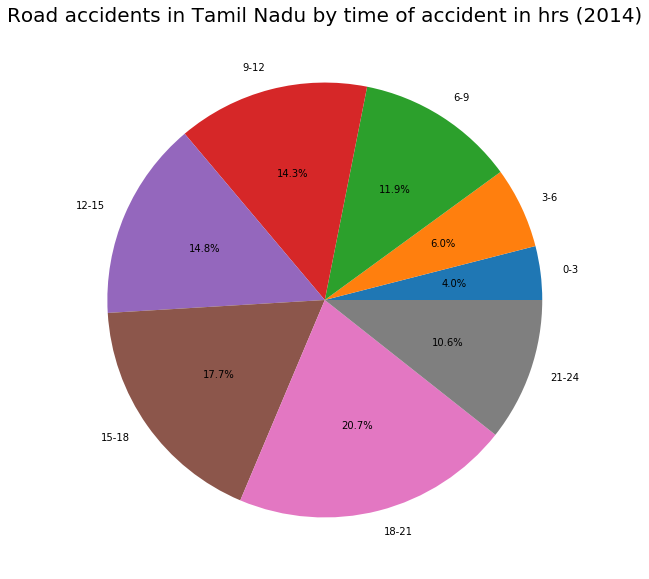

In [635]:
plt.figure(figsize=(10,10))
plt.pie(list1,labels=labels,autopct='%1.1f%%')
plt.title('Road accidents in Tamil Nadu by time of accident in hrs (2014)',size=20)